In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier


D:\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\Anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
df = pd.read_csv("D:\\Autism_Data.arff")

In [5]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [6]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [7]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [8]:
# Value counts of variables
print("Gender ",df['gender'].value_counts())



Gender  m    367
f    337
Name: gender, dtype: int64


In [9]:
print("Ethnicity ",df['ethnicity'].value_counts())


Ethnicity  White-European       233
Asian                123
?                     95
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64


In [10]:
print("Jundice ",df['jundice'].value_counts())


Jundice  no     635
yes     69
Name: jundice, dtype: int64


In [11]:
print("Austim ",df['austim'].value_counts())


Austim  no     613
yes     91
Name: austim, dtype: int64


In [12]:
print("Country ",df['contry_of_res'].value_counts())


Country  'United States'           113
'United Arab Emirates'     82
'New Zealand'              81
India                      81
'United Kingdom'           77
                         ... 
China                       1
Chile                       1
Lebanon                     1
Burundi                     1
Cyprus                      1
Name: contry_of_res, Length: 67, dtype: int64


In [13]:
print("used_app_before",df['used_app_before'].value_counts())


used_app_before no     692
yes     12
Name: used_app_before, dtype: int64


In [14]:
print("Result",df['result'].value_counts())


Result 4     131
3     110
5      83
2      74
6      70
7      57
8      55
9      47
1      33
10     30
0      14
Name: result, dtype: int64


In [15]:
print("Age Desc",df['age_desc'].value_counts())


Age Desc '18 and more'    704
Name: age_desc, dtype: int64


In [16]:
print("Relation",df['relation'].value_counts())


Relation Self                          522
?                              95
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64


In [17]:
print("ASD",df['Class/ASD'].value_counts())


ASD NO     515
YES    189
Name: Class/ASD, dtype: int64


In [18]:
print("Age",df['age'].value_counts())


Age 21     49
20     46
23     37
22     37
19     35
24     34
27     31
18     31
30     30
26     28
25     27
29     27
28     24
31     21
17     18
32     18
35     17
37     17
33     16
40     16
42     15
36     13
38     12
34     12
43     11
44     10
47      8
39      7
55      6
53      6
46      6
50      5
52      5
48      4
45      4
49      3
41      3
54      2
58      2
?       2
56      2
61      2
59      1
64      1
60      1
383     1
51      1
Name: age, dtype: int64


In [19]:
df['ethnicity'] = df['ethnicity'].replace("?", "White-European")


In [20]:
df['relation'] = df['relation'].replace("?", "Self")


In [21]:
df['age'] = df['age'].replace("?", int(0))

In [22]:
# Calculate the average age
df['age'] = df['age'].astype("int64")


In [23]:
average_age = df['age'].mean()
average_age

29.613636363636363

In [24]:
df['age'] = df['age'].replace(0, int(average_age))
df['age'] = df['age'].replace(383, int(average_age))

# Applying Random Forest Classifier to Identify the Most Important Features

### Separate the features (X) and target (y)


In [25]:
X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']


## Encode Categorical Features 


In [26]:
categorical_cols = X.select_dtypes(include='object').columns

for col in categorical_cols:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])



# Encode target variable

In [27]:
# Encode target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,

# Apply Random Forest

In [28]:
model = RandomForestClassifier()
model.fit(X, y)


RandomForestClassifier()

## Get feature importances

In [29]:
# Get feature importances
importances = model.feature_importances_


## Create a DataFrame to store the importance scores

In [30]:

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})



## Sort the DataFrame

In [31]:
# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)



In [32]:
# Print the top N most important columns
N = 21  # Number of top important columns to display

top_columns = feature_importance_df.head(N)['Feature'].tolist()


# Most Important Columns

In [33]:
print("Top", N, "most important columns:")

for column in top_columns:
    
    print(column)

Top 21 most important columns:
result
A9_Score
A6_Score
A5_Score
A4_Score
A3_Score
A7_Score
A10_Score
A1_Score
A2_Score
contry_of_res
ethnicity
age
A8_Score
relation
austim
gender
jundice
used_app_before
age_desc


## Drop Unnecessary Columns

In [34]:
df = df.drop(['used_app_before', 'age_desc'], axis = 1)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,White-European,no,no,Egypt,2,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,f,White-European,no,no,Russia,7,Self,YES
700,1,0,0,0,0,0,0,1,0,1,34,m,Hispanic,no,no,Mexico,3,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,24,f,White-European,no,no,Russia,7,Self,YES
702,1,0,0,1,1,0,1,0,1,1,35,m,'South Asian',no,no,Pakistan,6,Self,NO


In [35]:
display(df.dtypes)

A1_Score          int64
A2_Score          int64
A3_Score          int64
A4_Score          int64
A5_Score          int64
A6_Score          int64
A7_Score          int64
A8_Score          int64
A9_Score          int64
A10_Score         int64
age               int64
gender           object
ethnicity        object
jundice          object
austim           object
contry_of_res    object
result            int64
relation         object
Class/ASD        object
dtype: object

In [36]:
# Value counts of variables
print("\nEthnicity \n",df['ethnicity'].value_counts())



Ethnicity 
 White-European       328
Asian                123
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64


In [37]:
print("\nRelation\n",df['relation'].value_counts())


Relation
 Self                          617
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64


In [38]:
print("\nAge\n",df['age'].value_counts())


Age
 21    49
20    46
23    37
22    37
19    35
24    34
18    31
27    31
29    30
30    30
26    28
25    27
28    24
31    21
32    18
17    18
35    17
37    17
40    16
33    16
42    15
36    13
38    12
34    12
43    11
44    10
47     8
39     7
55     6
53     6
46     6
52     5
50     5
48     4
45     4
49     3
41     3
58     2
54     2
56     2
61     2
64     1
59     1
60     1
51     1
Name: age, dtype: int64


# Data Analysis

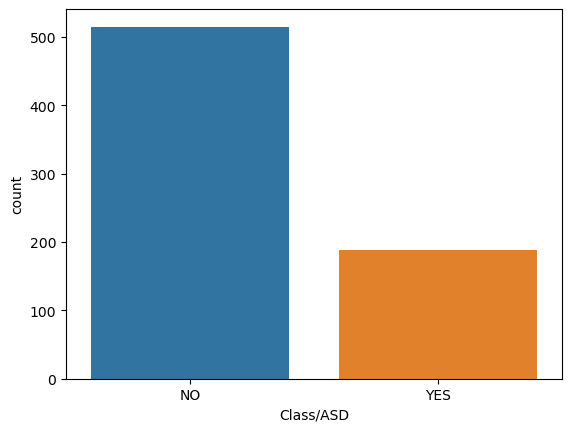

In [39]:
# Bar plot of ASD categories
sns.countplot(x='Class/ASD', data=df)
plt.show()



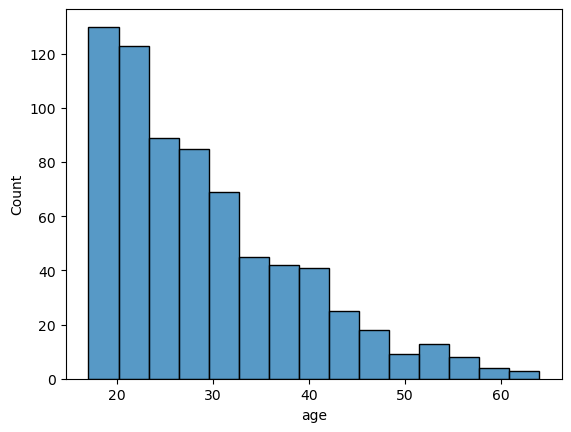

In [40]:
# Histogram of age distribution
sns.histplot(x='age', data=df)
plt.show()



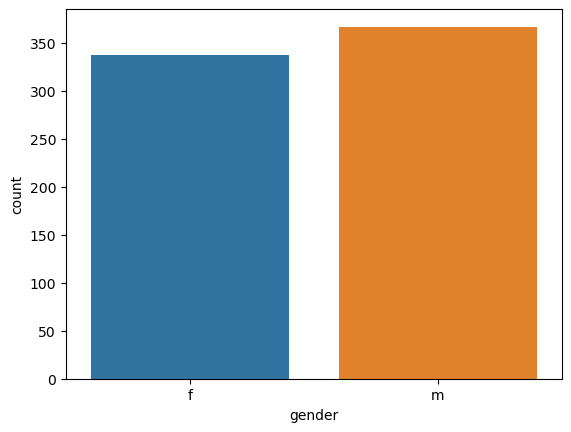

In [41]:
# Bar plot of gender distribution
sns.countplot(x='gender', data=df)
plt.show()



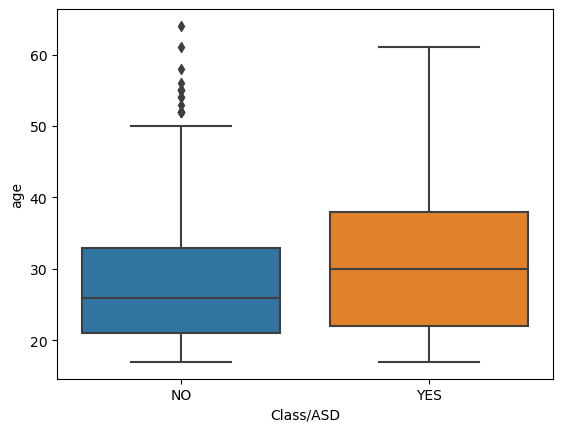

In [42]:
# Box plot of age distribution by ASD category
sns.boxplot(x='Class/ASD', y='age', data=df)
plt.show()

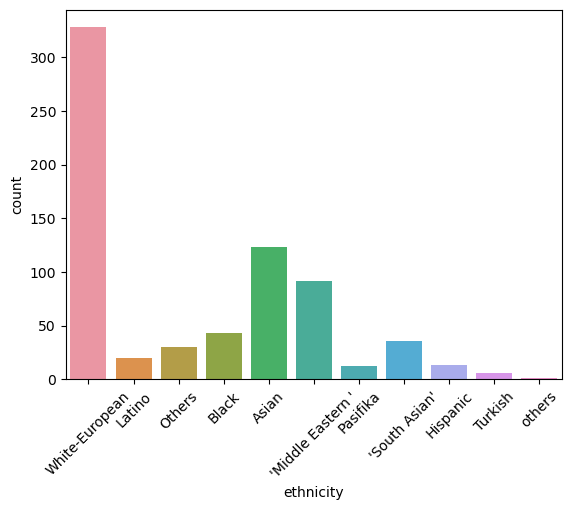

In [43]:
# Count the number of samples from each ethnicity
df['ethnicity'].value_counts()

# Bar plot of ethnicity distribution
sns.countplot(x='ethnicity', data=df)
plt.xticks(rotation=45)
plt.show()

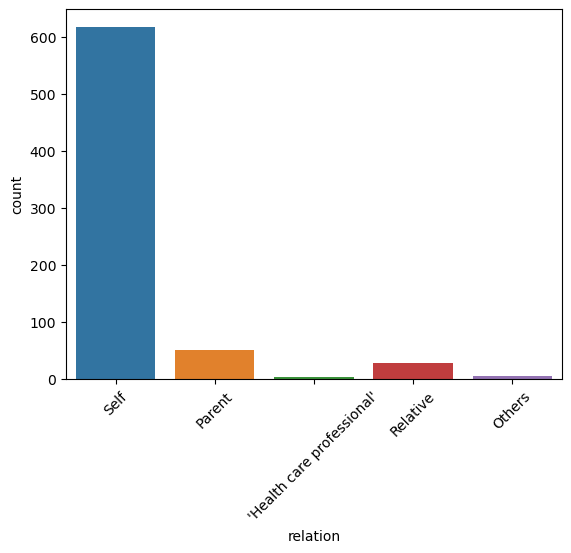

In [44]:
# Count the different types of relationships
df['relation'].value_counts()

# Bar plot of relationship types
sns.countplot(x='relation', data=df)
plt.xticks(rotation=45)
plt.show()

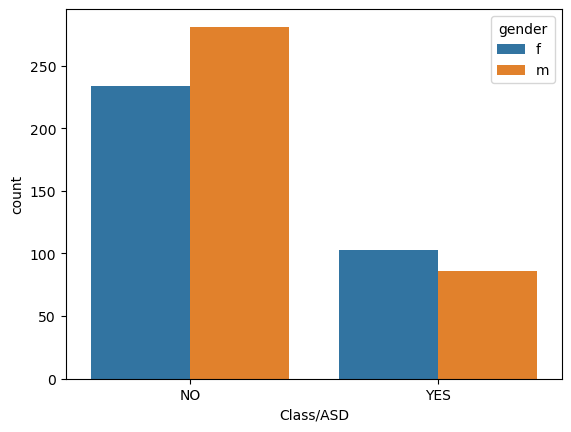

In [45]:
# Create a countplot of gender distribution by ASD category
sns.countplot(x='Class/ASD', hue='gender', data=df)
plt.show()

In [46]:
# Create a crosstab of relationship type and ASD category
relation_asd_crosstab = pd.crosstab(df['relation'], df['Class/ASD'])

# Display the crosstab
print(relation_asd_crosstab)

Class/ASD                    NO  YES
relation                            
'Health care professional'    3    1
Others                        4    1
Parent                       38   12
Relative                     19    9
Self                        451  166


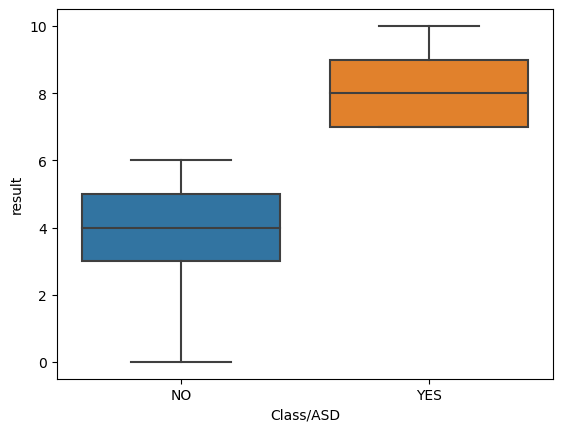

In [47]:
# Create a box plot of result by ASD category
sns.boxplot(x='Class/ASD', y='result', data=df)
plt.show()

# Applying Naive Bayes for Prediction

 * Naive Bayes is a simple and popular algorithm used in machine learning for classification tasks. It is based on Bayes'   theorem, which calculates the probability of an event based on prior knowledge.

* The Naive Bayes algorithm assumes that all features (or attributes) in the dataset are independent of each other, hence the term "naive." This assumption simplifies the calculation process and makes the algorithm computationally efficient.

In [74]:
X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

categorical_cols = X.select_dtypes(include='object').columns

for col in categorical_cols:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])
    
# Encode target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the GaussianNB model
model = GaussianNB()

In [75]:
# Train the model
model.fit(X_train, y_train)

GaussianNB()

In [76]:
# Make predictions on the test set
y_pred = model.predict(X_test)


# Accuracy of Naive Bayes Model

In [77]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9858156028368794


* Precision: How many of the predicted positive cases were actually positive? (measures accuracy of positive predictions)

* Recall: How many of the actual positive cases were correctly predicted? (measures sensitivity or true positive rate)

* F1-score: A combination of precision and recall, it represents a balanced measure of accuracy for both positive and negative cases.

* Support: The number of instances (or data points) in each class.

* Macro Avg: The average of precision, recall, and F1-score calculated independently for each class, without considering class imbalance.

* Weighted Avg: The average of precision, recall, and F1-score calculated by considering the class imbalance, giving more weight to the larger class.

In [78]:
# Generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.97      0.97      0.97        36

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141



* A confusion matrix is like a report card that shows how well a test or model guessed things, telling us how many times it was right and how many times it was wrong.

In [79]:
# Generate confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[104   1]
 [  1  35]]


# Test Case Naive Bayes

In [82]:
# Creating a test case for X_train (as provided in the previous response)
test_case = pd.DataFrame({
    'A1_Score': [1, 0, 1, 1, 0],
    'A2_Score': [1, 0, 0, 1, 1],
    'A3_Score': [1, 0, 1, 0, 0],
    'A4_Score': [1, 0, 1, 1, 0],
    'A5_Score': [0, 0, 1, 1, 1],
    'A6_Score': [0, 0, 1, 0, 1],
    'A7_Score': [0, 1, 1, 0, 0],
    'A8_Score': [1, 1, 1, 1, 0],
    'A9_Score': [0, 0, 1, 1, 1],
    'A10_Score': [0, 1, 1, 1, 1],
    'age': [43, 28, 37, 32, 52],
    'gender': [1, 0, 0, 0, 1],
    'ethnicity': [9, 2, 9, 3, 9],
    'jundice': [0, 0, 0, 0, 0],
    'austim': [0, 0, 1, 0, 0],
    'contry_of_res': [47, 3, 9, 27, 40],
    'result': [5, 3, 9, 7, 5],
    'relation': [4, 4, 4, 4, 4]
})

# Assuming you have already trained your Naive Bayes model 'nb_model'

# Assuming you have the actual target values for the test case in a separate DataFrame called 'y_test'
y_test_actual = pd.DataFrame({'Class/ASD': [1, 0, 1, 0, 1]})

# Predicting the target variable for the test case
y_pred = model.predict(test_case)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test_actual, y_pred)

# Printing the accuracy
print("Test Case Accuracy:", accuracy)

Test Case Accuracy: 0.4


# Apply K-Neighbors Classifier

In [83]:
# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can modify the number of neighbors (k) as needed

In [84]:
# Train the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
# Predict the target values for the test data
y_pred = knn.predict(X_test)

In [87]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9361702127659575
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.86      0.87        36

    accuracy                           0.94       141
   macro avg       0.92      0.91      0.92       141
weighted avg       0.94      0.94      0.94       141



# Test Case of KNN

In [88]:
# Creating a test case for X_train (as provided in the previous response)
test_case = pd.DataFrame({
    'A1_Score': [1, 0, 1, 1, 0],
    'A2_Score': [1, 0, 0, 1, 1],
    'A3_Score': [1, 0, 1, 0, 0],
    'A4_Score': [1, 0, 1, 1, 0],
    'A5_Score': [0, 0, 1, 1, 1],
    'A6_Score': [0, 0, 1, 0, 1],
    'A7_Score': [0, 1, 1, 0, 0],
    'A8_Score': [1, 1, 1, 1, 0],
    'A9_Score': [0, 0, 1, 1, 1],
    'A10_Score': [0, 1, 1, 1, 1],
    'age': [43, 28, 37, 32, 52],
    'gender': [1, 0, 0, 0, 1],
    'ethnicity': [9, 2, 9, 3, 9],
    'jundice': [0, 0, 0, 0, 0],
    'austim': [0, 0, 1, 0, 0],
    'contry_of_res': [47, 3, 9, 27, 40],
    'result': [5, 3, 9, 7, 5],
    'relation': [4, 4, 4, 4, 4]
})

# Assuming you have already trained your Naive Bayes model 'nb_model'

# Assuming you have the actual target values for the test case in a separate DataFrame called 'y_test'
y_test_actual = pd.DataFrame({'Class/ASD': [1, 0, 1, 0, 1]})

# Predicting the target variable for the test case
y_pred = knn.predict(test_case)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test_actual, y_pred)

# Printing the accuracy
print("Test Case Accuracy:", accuracy)

Test Case Accuracy: 0.4


# Apply Support Vector Machine

In [70]:
# Create an instance of SVC classifier
svc = SVC()

# Train the SVC classifier on the training data
svc.fit(X_train, y_train)

# Predict the target values for the test data using SVC
svc_y_pred = svc.predict(X_test)

# Evaluate the accuracy of the SVC classifier
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print("SVC Accuracy:", svc_accuracy)


# Generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

SVC Accuracy: 0.9574468085106383
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.86      0.87        36

    accuracy                           0.94       141
   macro avg       0.92      0.91      0.92       141
weighted avg       0.94      0.94      0.94       141



# Apply Ridge Classifier

In [71]:
ridge = RidgeClassifier()

ridge.fit(X_train, y_train)

ridge_y_pred = ridge.predict(X_test)

ridge_accuracy = accuracy_score(y_test, ridge_y_pred)

print("Ridge Accuracy:", ridge_accuracy)

# Generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Ridge Accuracy: 0.9716312056737588
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.86      0.87        36

    accuracy                           0.94       141
   macro avg       0.92      0.91      0.92       141
weighted avg       0.94      0.94      0.94       141



# Random Forest Classifier

In [60]:
# # Create an instance of Random Forest classifier
# rf_classifier = RandomForestClassifier()

# # Train the Random Forest classifier on the training data
# rf_classifier.fit(X_train, y_train)

# # Predict the target values for the test data using Random Forest
# rf_y_pred = rf_classifier.predict(X_test)

# # Evaluate the accuracy of the Random Forest classifier
# rf_accuracy = accuracy_score(y_test, rf_y_pred)
# print("Random Forest Accuracy:", rf_accuracy)

# Decision Tree Classifier

In [61]:
# # Create an instance of Decision Tree Classifier
# decision_tree = DecisionTreeClassifier()

# # Train the Decision Tree classifier on the training data
# decision_tree.fit(X_train, y_train)

# # Predict the target values for the test data using Decision Tree
# dt_y_pred = decision_tree.predict(X_test)

# # Evaluate the accuracy of the Decision Tree classifier
# dt_accuracy = accuracy_score(y_test, dt_y_pred)
# print("Decision Tree Accuracy:", dt_accuracy)


# Logistic Regression Classifier 

In [62]:
# # Create an instance of Logistic Regression classifier
# logistic_regression = LogisticRegression()

# # Train the Logistic Regression classifier on the training data
# logistic_regression.fit(X_train, y_train)

# # Predict the target values for the test data using Logistic Regression
# lr_y_pred = logistic_regression.predict(X_test)

# # Evaluate the accuracy of the Logistic Regression classifier
# lr_accuracy = accuracy_score(y_test, lr_y_pred)
# print("Logistic Regression Accuracy:", lr_accuracy)

In [63]:
print(df.dtypes)


A1_Score          int64
A2_Score          int64
A3_Score          int64
A4_Score          int64
A5_Score          int64
A6_Score          int64
A7_Score          int64
A8_Score          int64
A9_Score          int64
A10_Score         int64
age               int64
gender           object
ethnicity        object
jundice          object
austim           object
contry_of_res    object
result            int64
relation         object
Class/ASD        object
dtype: object


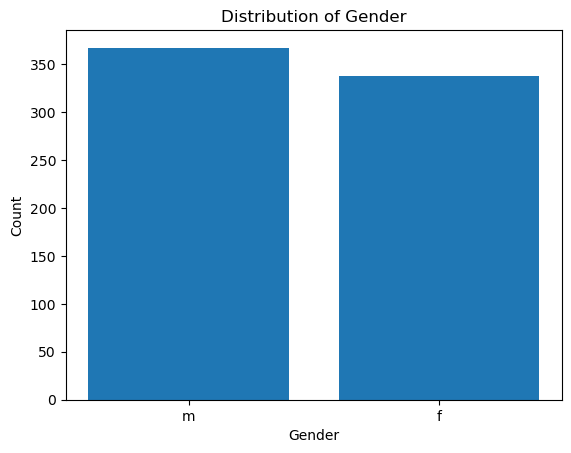

In [64]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each unique value in 'gender' column
gender_counts = df['gender'].value_counts()

# Create a bar plot
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

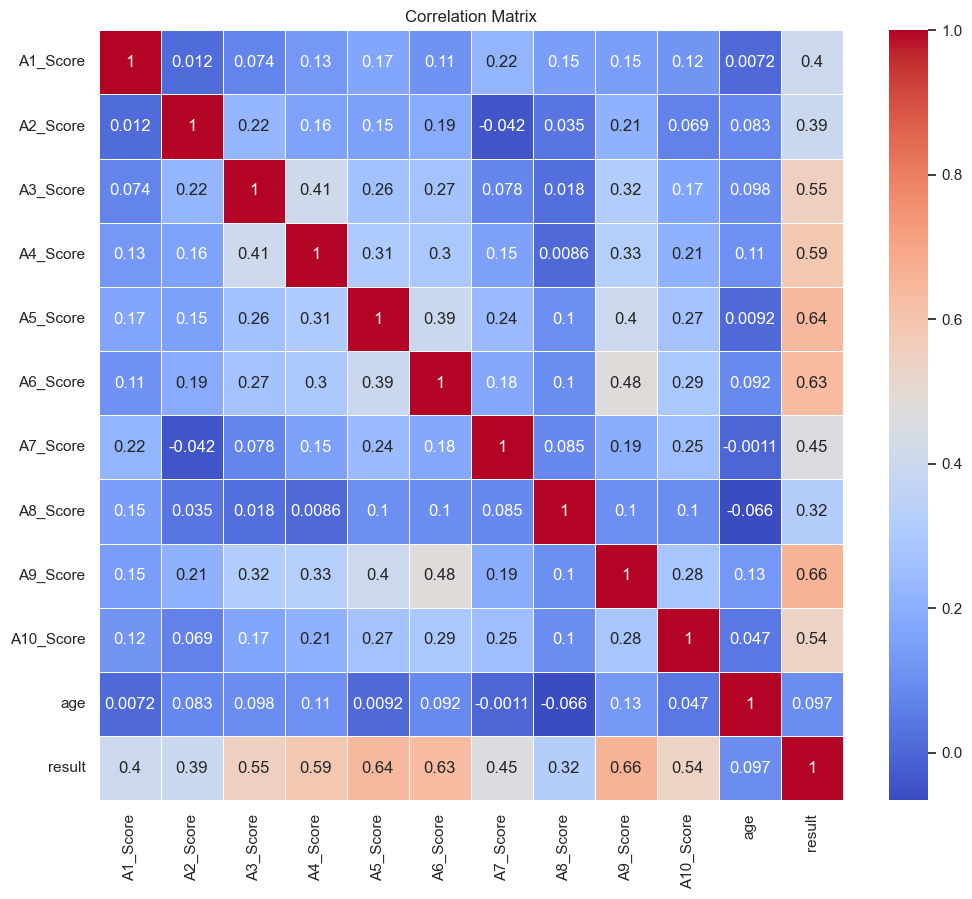

In [65]:
# dataset is stored in a DataFrame called "df"
numerical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                     'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
                     'age', 'result']

numerical_df = df[numerical_columns]

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create correlation plot
sns.set(style="white")
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [73]:
print(X_train.head())

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
24          1         1         1         1         0         0         0   
155         0         0         0         0         0         0         1   
210         1         0         1         1         1         1         1   
291         1         1         0         1         1         0         0   
537         0         1         0         0         1         1         0   

     A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jundice  austim  \
24          1         0          0   43       1          9        0       0   
155         1         0          1   28       0          2        0       0   
210         1         1          1   37       0          9        0       1   
291         1         1          1   32       0          3        0       0   
537         0         1          1   52       1          9        0       0   

     contry_of_res  result  relation  
24              47     